In [14]:
library(tidyverse)
library(lubridate)
library(countrycode)
library(ggplot2)
library(gridExtra)
library(grid)

In [15]:
muhira_df <- read.csv(file = '../input/muhira-dataset/muhira_2020.csv', head =TRUE, sep=';')

In [16]:
glimpse(muhira_df)

Rows: 58
Columns: 6
$ Published_date <fct> 09/11/2020, 23/08/2020, 16/02/2020, 21/12/2020, 23/02/…
$ Track_Name     <fct> Feeling, Yaravyemeye, BeBe, Nopfa, KWITI KWITI, My Sto…
$ Artist         <fct> Momo Melody, Momo Melody, Momo Melody, Double Jay, Dou…
$ Views          <int> 5400, 4800, 10000, 237000, 491000, 141000, 266000, 910…
$ URL            <fct> https://www.youtube.com/watch?v=l1iSdaEpD0g&ab_channel…
$ Sex            <fct> Male, Male, Male, Male, Male, Male, Male, Male, Male, …


In [17]:
summary(muhira_df)

    Published_date       Track_Name         Artist       Views       
 14/12/2020: 2     AGURA      : 1   Sat-B      : 6   Min.   :    80  
 16/02/2020: 2     Angelina   : 1   BIG FIZZO  : 4   1st Qu.: 38250  
 23/08/2020: 2     Appelle Moi: 1   Natacha    : 4   Median : 84000  
 01/06/2020: 1     Baby Girl  : 1   R FLOW     : 4   Mean   :135419  
 01/12/2020: 1     Beautiful  : 1   Alvin Smith: 3   3rd Qu.:200750  
 02/12/2020: 1     BeBe       : 1   B-Face     : 3   Max.   :806000  
 (Other)   :49     (Other)    :52   (Other)    :34                   
                                                                       URL    
 https://www.youtube.com/watch?v=0xqVIE8-XII&ab_channel=MomoMELODY       : 1  
 https://www.youtube.com/watch?v=25BypzOJpFw&ab_channel=KirikouA-kili    : 1  
 https://www.youtube.com/watch?v=2zwoIURkoy0&ab_channel=Sat-B            : 1  
 https://www.youtube.com/watch?v=3PnOkAqYTR4&ab_channel=MissErica        : 1  
 https://www.youtube.com/watch?v=4tP6KhlSMb8&

`summarise()` ungrouping output (override with `.groups` argument)



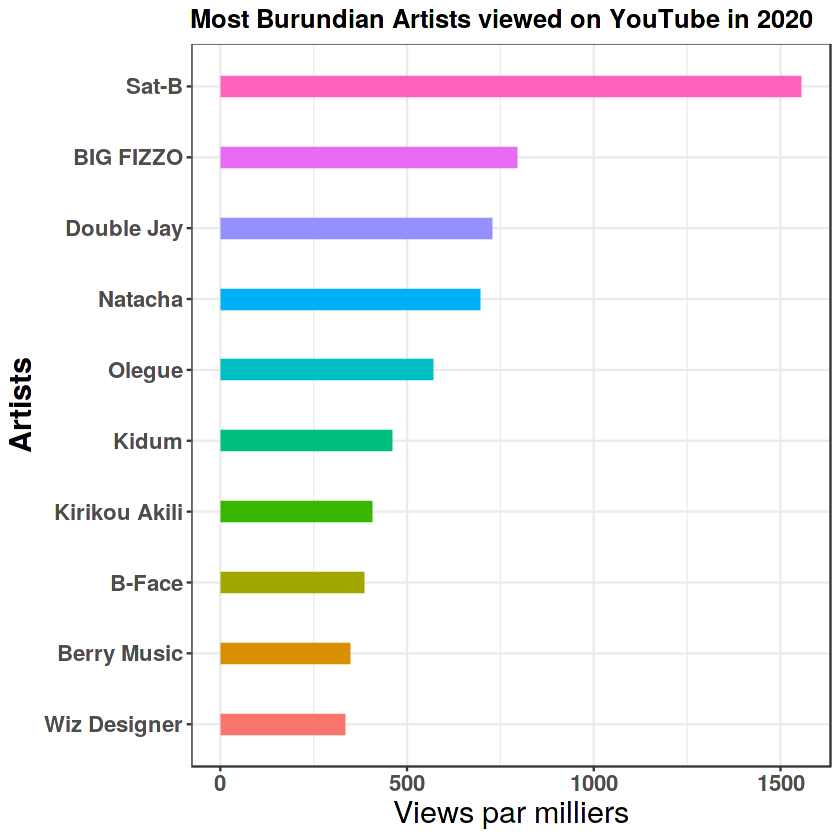

In [18]:
#Artists who have had the most views throughout the year. Top 10
trend_top10 <- muhira_df %>% 
  select(Artist,Views) %>% 
  group_by(Artist)  %>% 
  summarise(Total_Views = sum(Views)) %>%
  mutate(thousands = Total_Views/1000) %>%
  arrange(desc(thousands),Artist) %>%
  head(10)

trend_top10$Artist <- factor(trend_top10$Artist, levels = trend_top10$Artist [order(trend_top10$thousands)]) # in order to visualise the list in descending order

g3 <- ggplot(trend_top10, aes(x=Artist, y=thousands, size=6, color=Artist)) +
    #geom_point(size=3) + 
    geom_segment(aes(x=Artist,xend=Artist, y=0, yend=thousands)) +
    xlab("Artists") + ylab("Views par milliers") +
    ggtitle("Most Burundian Artists viewed on YouTube in 2020") +
    #labs(title = "Top Artists of 2017", x='',y='Streaming in millions') +
    theme_bw() +
    theme(legend.position = 'none', plot.title = element_text(size=15, hjust = -0.1, face = "bold"), axis.title.y = element_text(face = "bold"), axis.title.x = element_text(angle = 0)) +    
    coord_flip()

g3 + theme(text = element_text(size = 18), axis.text.x = element_text(size = 13, face="bold"), axis.text.y = element_text(size = 13, face="bold"))

`summarise()` ungrouping output (override with `.groups` argument)



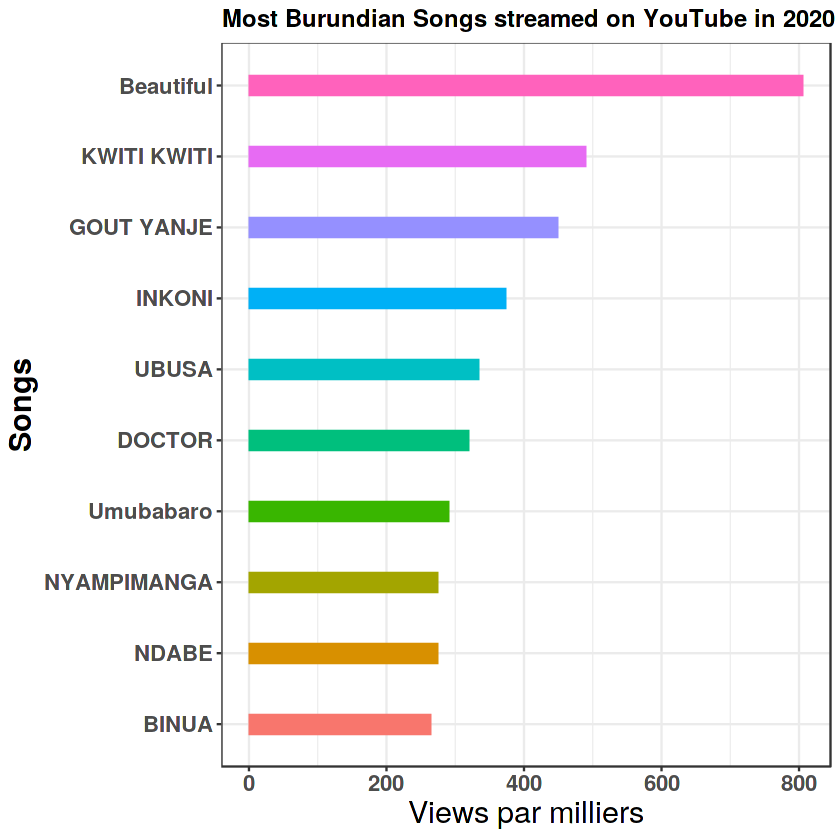

In [19]:
#names(muhira_df)[names(muhira_df) == "Track Name"] <- "Track_Name"

songs_top10 <- muhira_df %>% 
  select(Track_Name,Views) %>% 
  group_by(Track_Name)  %>% 
  summarise(Total_Views = sum(Views)) %>%
  mutate(thousands = Total_Views/1000) %>%
  arrange(desc(Total_Views),Track_Name) %>%
  head(10)


songs_top10$Track_Name <- factor(songs_top10$Track_Name, levels = songs_top10$Track_Name [order(songs_top10$thousands)]) # in order to visualise the list in descending order

g3 <- ggplot(songs_top10, aes(x=Track_Name, y=thousands, size=6, color=Track_Name)) +
    #geom_point(size=3) + 
    geom_segment(aes(x=Track_Name,xend=Track_Name, y=0, yend=thousands)) +
    xlab("Songs") + ylab("Views par milliers") +
    ggtitle("Most Burundian Songs streamed on YouTube in 2020") +
    #labs(title = "Top Artists of 2017", x='',y='Streaming in millions') +
    theme_bw() +
    theme(legend.position = 'none', plot.title = element_text(size=14, hjust = -0.1, face = "bold"), axis.title.y = element_text(face = "bold"), axis.title.x = element_text(angle = 0)) +    
    coord_flip()

g3 + theme(text = element_text(size = 18), axis.text.x = element_text(size = 13, face="bold"), axis.text.y = element_text(size = 13, face="bold"))


`summarise()` ungrouping output (override with `.groups` argument)



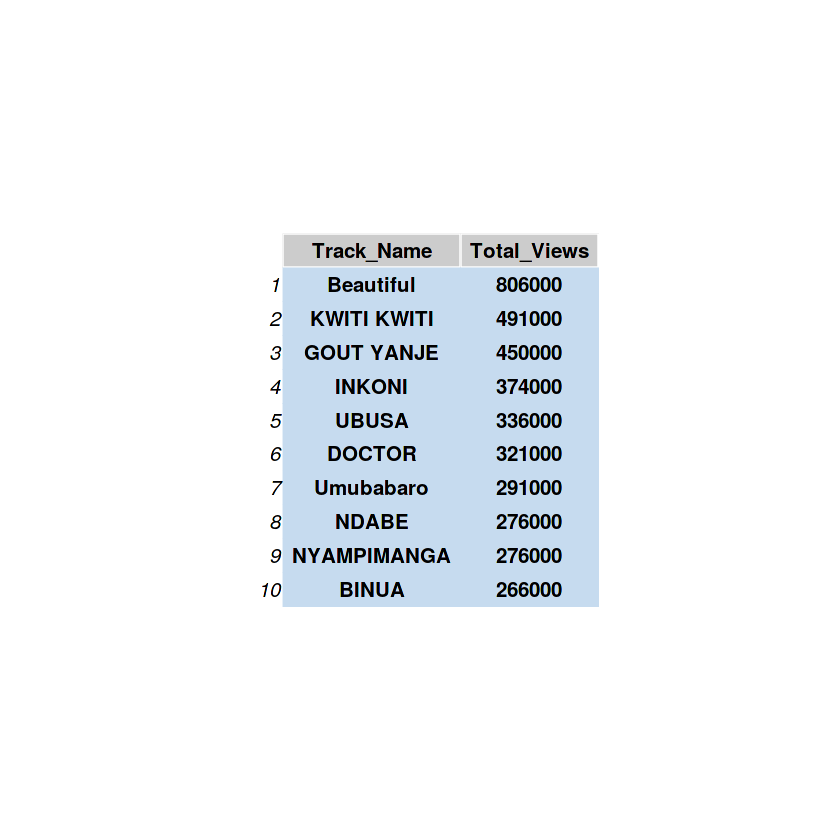

In [20]:
songs_top10 <- muhira_df %>% 
  select(Track_Name,Views) %>% 
  group_by(Track_Name)  %>% 
  summarise(Total_Views = sum(Views)) %>%
  #mutate(thousands = Total_Views/1000) %>%
  arrange(desc(Total_Views),Track_Name) %>%
  head(10)


thm <- ttheme_default(
    core=list(bg_params = list(fill = blues9[3:3], col=NA),
        fg_params=list(fontface=2)),
    colhead=list(fg_params=list(cex=1, col="black")))
    

table <- tableGrob(songs_top10,theme=thm)


grid.draw(table)

`summarise()` ungrouping output (override with `.groups` argument)



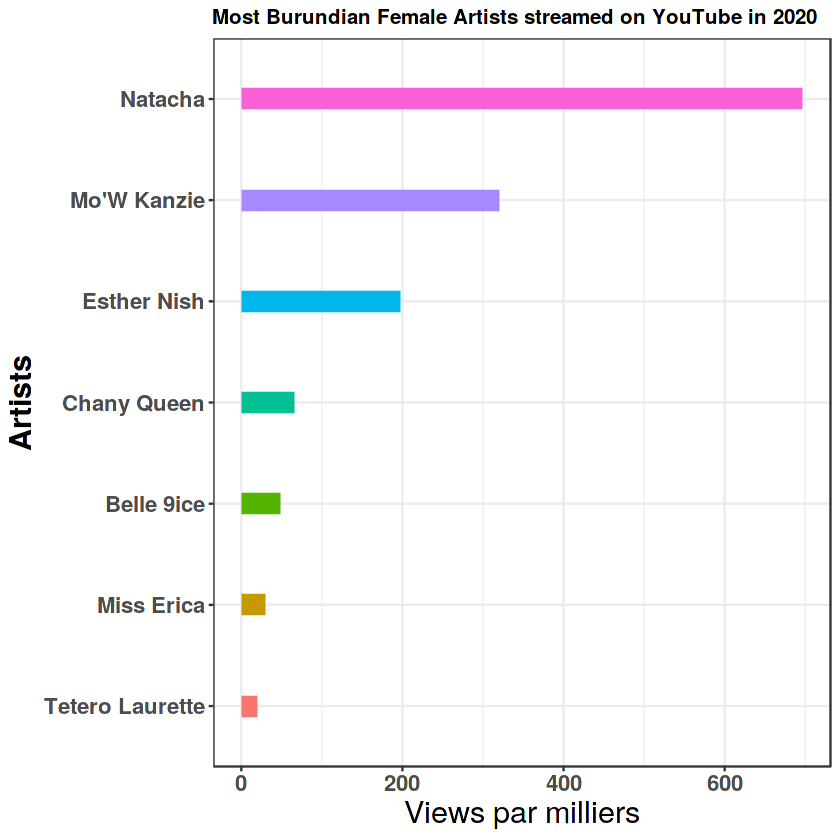

In [21]:
female_top10 <- muhira_df %>%
  filter(Sex == "Female") %>%
  select(Artist,Views) %>% 
  group_by(Artist)  %>% 
  summarise(Total_Views = sum(Views)) %>%
  mutate(thousands = Total_Views/1000) %>%
  arrange(desc(Total_Views),Artist) %>%
  head(10)


female_top10$Artist <- factor(female_top10$Artist, levels = female_top10$Artist [order(female_top10$thousands)]) # in order to visualise the list in descending order

g3 <- ggplot(female_top10, aes(x=Artist, y=thousands, size=6, color=Artist)) +
    #geom_point(size=3) + 
    geom_segment(aes(x=Artist,xend=Artist, y=0, yend=thousands)) +
    xlab("Artists") + ylab("Views par milliers") +
    ggtitle("Most Burundian Female Artists viewed on YouTube in 2020") +
    #labs(title = "Top Artists of 2017", x='',y='Streaming in millions') +
    theme_bw() +
    theme(legend.position = 'none', plot.title = element_text(size=12, hjust = -0.1, face = "bold"), axis.title.y = element_text(face = "bold"), axis.title.x = element_text(angle = 0)) +    
    coord_flip()

g3 + theme(text = element_text(size = 18), axis.text.x = element_text(size = 13, face="bold"), axis.text.y = element_text(size = 13, face="bold"))


`summarise()` ungrouping output (override with `.groups` argument)



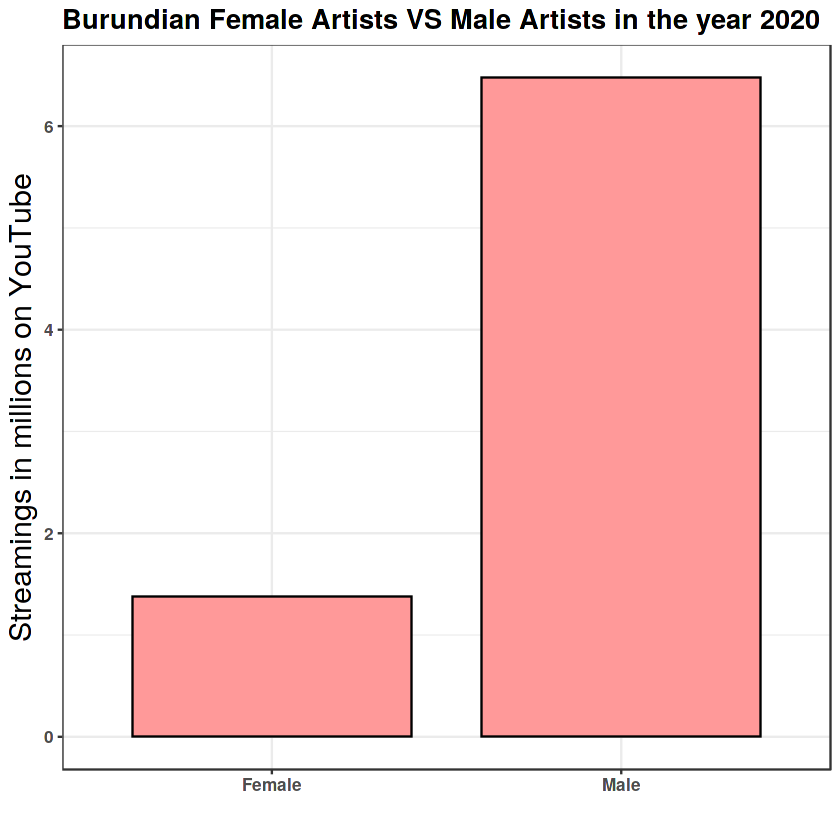

In [23]:
maleVSfemale <- muhira_df %>%
  select(Sex,Views) %>%
  group_by(Sex) %>%
  summarise(Total_Views = sum(Views)) %>%
  mutate(thousands = Total_Views/1000000)

maleVSfemale$Sex <- factor(maleVSfemale$Sex, levels=maleVSfemale$Sex[order((maleVSfemale$Sex))])


g2 <- ggplot(data=maleVSfemale,aes(x=Sex,y=thousands,group=1)) +
  geom_bar(stat = "identity", fill="#FF9999", colour="black", width = 0.8 ) + 
  #geom_line(stat = "identity",  color = "yellowgreen") + 
  #geom_point() +
  #theme_bw() + 
  xlab("") + ylab("Streamings in millions on YouTube") +
    ggtitle("Burundian Female Artists VS Male Artists in the year 2020")+

    theme_bw() +
    theme(legend.position = 'none', plot.title = element_text(size=16, hjust = 0, face = "bold"))

g2 + theme(text = element_text(size = 18), axis.text.x = element_text(size = 10, face="bold"), axis.text.y = element_text(size = 10, face="bold"))